# [3920] Homework 5 - Multi-model
Data file: https://raw.githubusercontent.com/vjavaly/Baruch-CIS-3920/main/data/liver_cirrhosis_stage_10K.csv

## Homework Submission Rules (for all homework assignments)
* Homework is due by 2:30 PM on the due date
  * No late submission will be accepted
* You must submit a cleanly executed notebook (*.ipynb)
  * Verify that you are submitting the correct homework file
* Homework file naming convention
  * LastName_FirstName_HwX.ipynb  [Replace X with the homework #]
    * 1 point deducted for submitting homework not complying with naming convention
* Before submission, execute "Kernel -> Restart Kernel and Run All Cells"
  * 1 point deducted for not submitting a cleanly executed notebook

## Homework 5 Requirements
* Load data
  * Do NOT use meaningless columns (e.g. 'Patient_ID') as independent variables
* Examine data
  * Display (e.g. bar chart) class distribution of target variable (Disease_Stage)
* Prepare data for model training
  * Perform the following data preparation steps
    * Handle missing values
    * Variable encoding
    * Feature scaling
  * Do not delete any rows
  * Do not drop any columns, EXCEPT when performing variable encoding
* Display a sample of 20 rows of the final set of independent variables used for all the model trainings
* Train logistic regression model
  * Must modify at least 2 hyperparameters (not including random_state)
    * The hyperparameter values you set CANNOT be the same as the defaults
    * You can modify as many hyperparameters as your want
  * Calculate and display model accuracy
* Train the following classification models (KNN, Random Forest & SVC).  For the SVC model, you can use any SVC classifier.  Perform the following for each model:
  * Must modify at least 2 hyperparameters (not including random_state) in each model
    * You can modify as many hyperparameters as desired
      * **NOTE: The objective of changing these hyperparameters is for each model's accuracy to exceed 80%**
      * The hyperparameter values you set CANNOT be the same as the default value
    * If you used hyperparameter random_state in your Logistic Regression model training, use the same value when training the other models
    * Do NOT re-split training and test sets when training the other models
  * Calculate and display this model's accuracy
    * **NOTE: For each of these 3 classification models, model accuracy MUST exceed 80%**
* Display (e.g. bar chart) model accuracy for all 4 models

#### NOTES
- You must TRY to resolve all errors and warnings
- You may set random_state hyperparameter to control the accuracy output

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 12/12/24 23:13:50


### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Add other imports as needed
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Load data

Liver Cirrhosis Stage Classification

Context
> Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption.

Data source
> Mayo Clinic study on primary biliary cirrhosis (PBC) of the liver carried out from 1974 to 1984.

> **NOTE: The professor has modified this dataset for the purposes of this assignment.  You must use this modified dataset for this homework.**

Features
* N_Days : # days between registration and the earlier of death, transplantation, or study analysis time in 1986
* Status : patient status - values = C (censored), CL (censored due to liver tx), or D (death)
* Drug : type of drug given (D-penicillamine) or placebo
* Age : patient age (days)
* Gender : M (male) or F (female)
* Ascites : presence of ascites N (No) or Y (Yes)
* Hepatomegaly : presence of hepatomegaly N (No) or Y (Yes)
* Spiders : presence of spiders N (No) or Y (Yes)
* Edema : presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
* Bilirubin : serum bilirubin in [mg/dl]
* Cholesterol : serum cholesterol in [mg/dl]
* Albumin : albumin in [gm/dl]
* Copper : urine copper in [ug/day]
* Alk_Phos : alkaline phosphatase in [U/liter]
* SGOT : serum glutamic-oxaloacetic transaminase, an enzyme level indicating liver health in [U/ml]
* Tryglicerides : triglicerides in [mg/dl]
* Platelets : platelets per cubic [ml/1000]
* Prothrombin : prothrombin time in seconds [s]
* Patient_ID : patient ID

Target variable to predict:
* Disease_Stage: stage_1, stage_2, stage_3

In [3]:
# Read data from file (liver_cirrhosis_stage_10K.csv) into dataframe
#  NOTES:
#   Field separator is ';'
#   Use column 'Patient_ID' as index_col
df = pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-3920/main/data/liver_cirrhosis_stage_10K.csv', sep=';', index_col='Patient_ID')

In [4]:
# Setting a seed that will be used for testing purposes
SEED = 645

### Examine data

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
# Review dataframe shape
df.shape

(10000, 19)

In [7]:
# Display a sample of 5 rows from dataframe
df.sample(5)

,N_Days,Status,Drug,Age,Gender,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Disease_Stage
Patient_ID,,,,,,,,,,,,,,,,,,,
16574,3445.0,C,Placebo,14610.0,F,Y,Y,Y,N,0.6,252.000000,3.83,41.000000,843.000000,65.100000,83.000000,117.0,10.9,stage_3
4664,4556.0,C,D-penicillamine,12839.0,M,N,N,N,N,1.1,361.000000,3.64,36.000000,5430.200000,67.080000,89.000000,344.0,10.6,stage_1
19309,691.0,C,Placebo,17185.0,F,Y,N,Y,N,0.8,369.510563,3.75,97.648387,1982.655769,122.556346,124.702128,269.0,10.4,stage_2
2435,3099.0,C,D-penicillamine,16300.0,F,N,N,N,N,0.9,248.000000,3.97,172.000000,646.000000,62.000000,84.000000,201.0,10.1,stage_1
22020,2330.0,C,D-penicillamine,10795.0,F,N,Y,N,N,3.7,347.000000,3.90,76.000000,2544.000000,221.650000,90.000000,129.0,11.5,stage_3


### Display bar chart showing class distribution for target variable (Disease_Stage)

In [8]:
# Display class distribution counts
df['Disease_Stage'].value_counts()

,count
Disease_Stage,
stage_2,3416
stage_1,3307
stage_3,3277


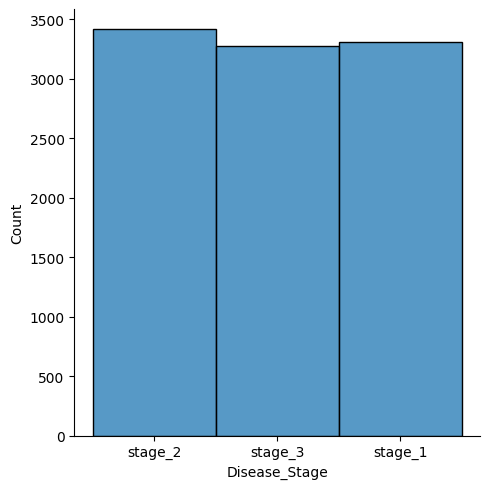

In [9]:
# Display bar chart showing class distribution
sns.displot(df['Disease_Stage'])

### Prepare data for model training
* Do not delete any rows
* Do not drop any columns, EXCEPT when performing variable encoding

#### Check for missing values

In [10]:
df.isna().sum()

,0
N_Days,18
Status,107
Drug,0
Age,25
Gender,44
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


#### Use the SimpleImputer to replace missing values

In [11]:
# For categorical columns
freq_imputer = SimpleImputer(strategy='most_frequent')

# For continous columns
mean_imputer = SimpleImputer(strategy='mean')

In [12]:
# Categorical columns
replace_null_FREQ = ['Status', 'Gender']

# Continous columns
replace_null_MEAN = ['N_Days', 'Age',]

In [13]:
# Replace categorical nulls with most frequent category in respective column
df[replace_null_FREQ] = freq_imputer.fit_transform(df[replace_null_FREQ])

# Repalce continous nulls with mean in respective column
df[replace_null_MEAN] = mean_imputer.fit_transform(df[replace_null_MEAN])

#### Check for missing values again

In [14]:
df.isna().sum()

,0
N_Days,0
Status,0
Drug,0
Age,0
Gender,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


### Perform one-hot encoding

In [15]:
# Columns to OneHot encode
one_hot_cols = ['Drug', 'Gender', 'Ascites', 'Hepatomegaly', 'Spiders', 'Status']

In [16]:
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

### Perform label encoding

In [17]:
label_cols = ['Edema']

In [18]:
label_encoder = LabelEncoder()
df[label_cols] = df[label_cols].apply(label_encoder.fit_transform)

### Separate independent and dependent variables
* Independent variables: All variables EXCEPT Disease_Stage
* Dependent variable: Disease_Stage

In [19]:
x = df.drop('Disease_Stage', axis=1)
y = df['Disease_Stage']

#### Standardize the data

In [20]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)

### Display a sample of 20 rows of the final set of independent variables used for all the model trainings

In [21]:
x_scaled.sample(20)

,N_Days,Age,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug_Placebo,Gender_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Status_CL,Status_D
8962,0.689777,0.483690,-0.447602,-0.611553,-0.020515,0.956579,-0.503095,-0.005996,-0.933724,0.038924,0.560243,-1.144955,-1.322694,-0.355321,-0.697529,-0.796904,-0.917029,-0.289441,-0.766027
1864,0.591633,0.135119,-0.447602,-0.548008,-0.020515,0.014204,-0.027052,-0.005996,-0.009922,0.038924,-0.098129,-0.481190,0.756033,-0.355321,1.433632,-0.796904,1.090478,-0.289441,-0.766027
5242,-0.542073,1.152743,1.513843,-0.484463,0.292733,0.223620,-0.750402,-0.328595,1.422160,-0.885023,-1.181910,0.735714,-1.322694,-0.355321,1.433632,1.254857,-0.917029,3.454940,-0.766027
3209,-1.174967,0.466836,1.513843,-0.293827,0.232579,-0.587870,-0.516835,0.672785,-0.966637,-0.613856,-1.080622,0.293203,-1.322694,-0.355321,1.433632,1.254857,-0.917029,-0.289441,1.305436
5627,-0.642969,0.466836,1.513843,0.638170,-0.148395,-1.922902,-1.148841,-0.648589,-0.871085,1.090626,-1.080622,0.293203,-1.322694,-0.355321,1.433632,1.254857,-0.917029,-0.289441,1.305436
8349,-1.222664,1.894025,1.513843,-0.590372,-0.020515,0.851871,-0.027052,-0.005996,-0.009922,0.038924,-0.969205,0.293203,0.756033,-0.355321,1.433632,-0.796904,1.090478,-0.289441,1.305436
5216,1.344685,1.173074,-0.447602,-0.272645,-0.559446,-0.011973,-0.571792,0.028881,-0.703338,-0.749439,-0.928690,0.293203,-1.322694,-0.355321,-0.697529,1.254857,-0.917029,-0.289441,1.305436
8437,-0.499880,-0.158077,-0.447602,-0.357372,-0.020515,-0.640224,-0.027052,-0.005996,-0.009922,0.038924,0.134833,-0.370562,0.756033,-0.355321,1.433632,-0.796904,1.090478,3.454940,-0.766027
4173,-0.542073,0.129501,1.513843,-0.484463,0.292733,-1.085234,-0.750402,-0.328595,1.422160,-0.885023,-0.918561,0.956969,-1.322694,-0.355321,-0.697529,1.254857,1.090478,3.454940,-0.766027
7513,0.432033,0.000000,-0.447602,-0.420917,-0.739907,-0.326099,-1.190059,-0.662015,-1.065374,-1.175560,-1.404743,0.956969,-1.322694,-0.355321,-0.697529,1.254857,1.090478,-0.289441,-0.766027


### Display a sample of 5 rows of the final set of dependent variables used for all the model trainings

In [22]:
y.sample(5)

,Disease_Stage
Patient_ID,
1722,stage_2
17573,stage_1
19021,stage_1
13185,stage_2
2006,stage_1


### Split data into training and test sets

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=SEED)

### Train Logistic Regression model
#### Must modify at least 2 hyperparameters (excluding random_state)

In [24]:
log_reg = LogisticRegression(max_iter=500, solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.2, class_weight='balanced', random_state=SEED)
log_reg.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', l1_ratio=0.2, max_iter=500,
                   penalty='elasticnet', random_state=645, solver='saga')

### Evaluate Logistic Regression model

In [25]:
y_pred = log_reg.predict(x_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print(f"LogReg Accuracy is : {round(lr_accuracy*100,2)}%")

LogReg Accuracy is : 57.5%


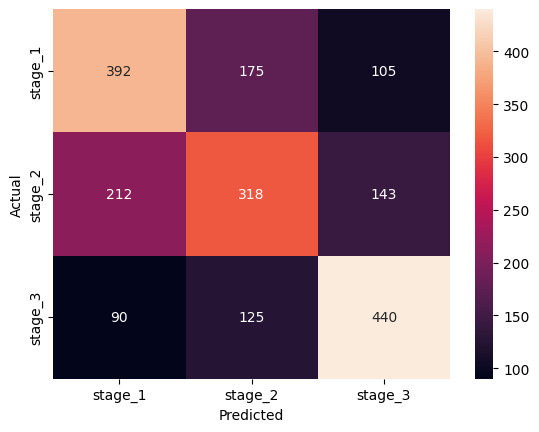

In [26]:
# Creating a confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Visualize confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

### Train KNN classifier model
#### Must modify at least 2 hyperparameters (excluding random_state)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5, leaf_size=15, weights = 'distance', algorithm = 'brute')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=15, weights='distance')

### Evaluate KNN model

In [28]:
y_pred = knn.predict(x_test)
knn_accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy is : {round(knn_accuracy*100,2)}%")

KNN Accuracy is : 87.25%


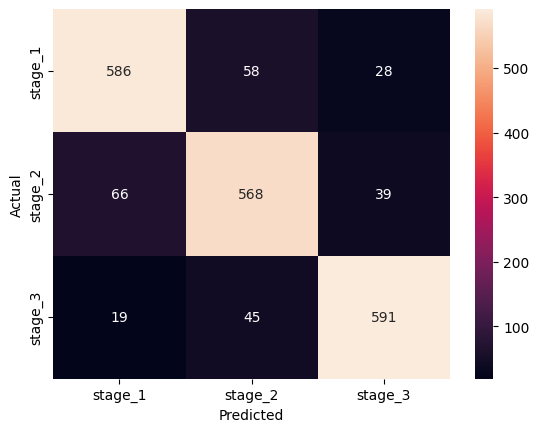

In [29]:
# Creating a confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Visualize confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

### Train Random Forest classifier model
#### Must modify at least 2 hyperparameters (excluding random_state)

In [30]:
rf = RandomForestClassifier(n_estimators=45, max_depth=10, min_samples_split=3, max_features = 'log2', random_state=SEED)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=3,
                       n_estimators=45, random_state=645)

### Evaluate Random Forest model

In [31]:
y_pred = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"RandFor Accuracy is : {round(rf_accuracy*100,2)}%")

RandFor Accuracy is : 90.1%


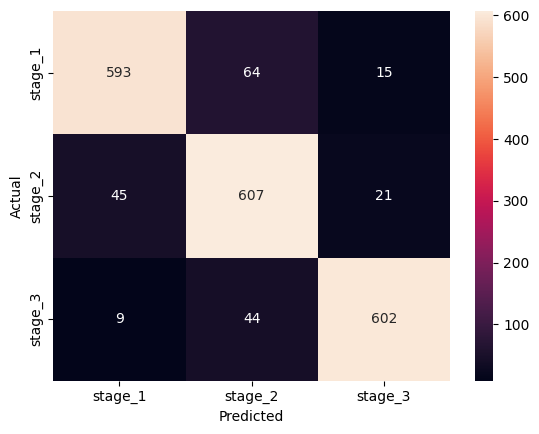

In [32]:
# Creating a confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Visualize confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

### Train Support Vector Classifier model
#### Must modify at least 2 hyperparameters (excluding random_state)

In [33]:
svc = SVC(kernel='poly', C=4, degree=4, class_weight='balanced', random_state=SEED)
svc.fit(x_train, y_train)

SVC(C=4, class_weight='balanced', degree=4, kernel='poly', random_state=645)

### Evaluate Support Vector Classifier model

In [34]:
y_pred = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test, y_pred)
print(f"SVC Accuracy is : {round(svc_accuracy*100,2)}%")

SVC Accuracy is : 83.15%


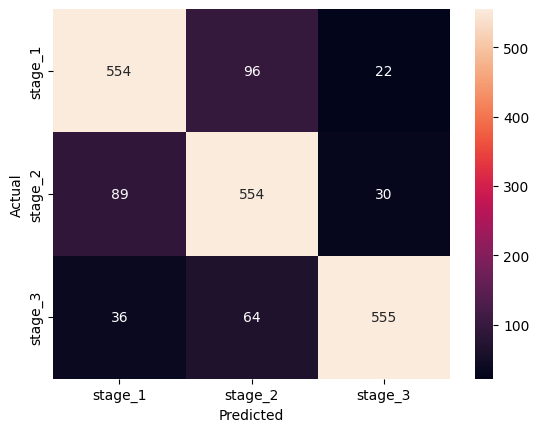

In [35]:
# Creating a confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Visualize confusion matrix
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()

### Display bar chart comparison of accuracy for all 4 models

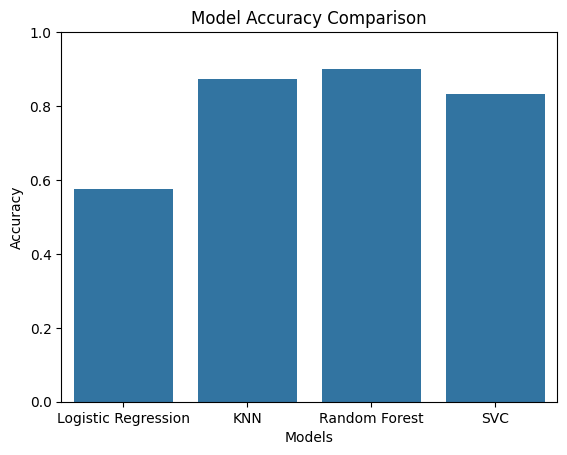

In [36]:
models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVC']
accuracy_scores = [lr_accuracy, knn_accuracy, rf_accuracy, svc_accuracy]

sns.barplot(x=models, y=accuracy_scores)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy
plt.show()